In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

import math
from sklearn import utils
from typing import Dict, Tuple
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('./Admission_Predict.csv', sep=",")

In [4]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
print('Кажется,что наши данные чисты')

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0
Кажется,что наши данные чисты


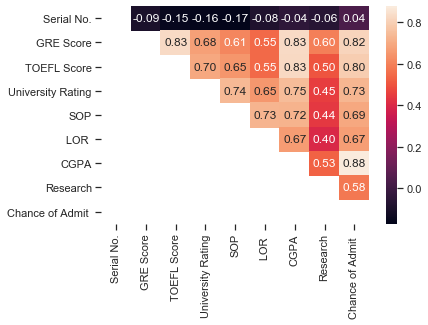

In [5]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(method='spearman'), mask=mask, annot=True, fmt='.2f')

Чем-то похоже на y=x


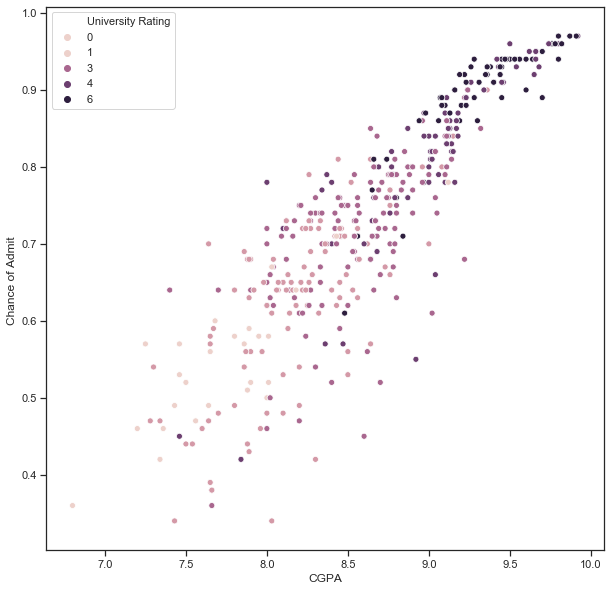

In [6]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='CGPA', y='Chance of Admit ', data=data, hue='University Rating')
print('Чем-то похоже на y=x')


In [7]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [8]:
x_array = data['CGPA'].values
y_array = data['Chance of Admit '].values

In [9]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(-1.0715116629341392, 0.20884722950068055)

In [10]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [11]:
y_array_regr = y_regr(x_array, b0, b1)

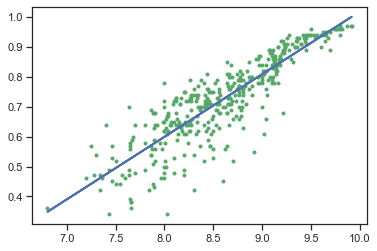

Линейная зависимость действительно заметна


In [12]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()
print('Линейная зависимость действительно заметна')

In [132]:
arr=data.to_numpy()
arr2=[]
for val in arr[:, [8]]:
    arr2.append(val[0])

[0.92, 0.76, 0.72, 0.8, 0.65, 0.9, 0.75, 0.68, 0.5, 0.45, 0.52, 0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7, 0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91, 0.9, 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87, 0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7, 0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55, 0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74, 0.64, 0.44, 0.46, 0.5, 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66, 0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9, 0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68, 0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94, 0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77, 0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8, 0.78, 0.84, 0.9, 0.92, 0.97, 0.8, 0.81, 0.75, 0.83, 0.96, 0.79, 0.93, 0.94, 0.86, 0.79, 0.8, 0.77, 0.7, 0.65, 0.61, 0.52, 0.57, 0.53, 0.67, 0.68, 0.81, 0.78, 0.65, 0.64, 0.64

In [137]:
iris = data
iris_X = arr[:, [1,2]]
iris_y = arr2

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(iris_X, iris_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = iris_X[:, 0], iris_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('GRE Score')
    ax.set_ylabel('TOEFL Score')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

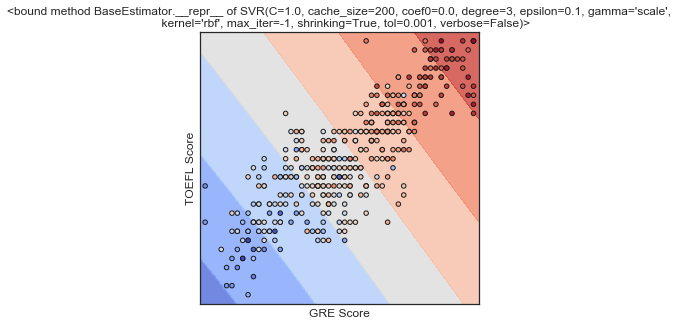

In [138]:
plot_cl(SVR())

In [100]:
def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = 4
    plot_colors = "ryb"
    plot_step = 0.02
    arr=data.to_numpy()
    for pairidx, pair in enumerate([[1, 2], [1, 6], [2, 6]]):
        # We only take the two corresponding features
        X = arr[:, pair]
        y = arr[:, [8]]

        # Train
        clf = DecisionTreeRegressor(random_state=0).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(data.columns[pair[0]])
        plt.ylabel(data.columns[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=data.columns[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show() 

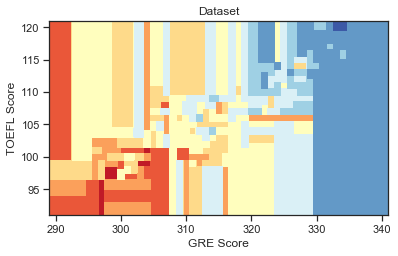

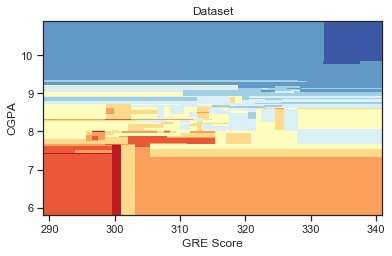

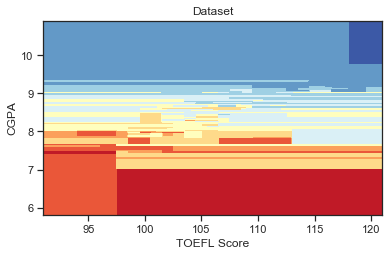

In [101]:
plot_tree_classification('Dataset', data)

In [136]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Результаты наших исследований довольно ожидаемы.Шансы поступить очень сильно зависят от твоих баллов за экзамен,суммы и их среднего значения.Так же мы заметили, что крайне редко человек сдает один вид экзаменов хорошо,а остальные -крайне плохо.Доминирующим признаком кажется CGPA, тк он сильнее всех остальных влияет на шанс поступления. Это заметно деревья классификации, он превращает картинки в более горизонтальные, а два других признака создают диагональную картинку(у них корреляция значительная)